# Clustering SVD para Análise de Dados de Gêneros Musicais

**Aluno:** Felipe de Castro Azambuja - 14675437


**Disciplina:** Álgebra Linear e Aplicações  
**Data de Entrega:** 10/12/2024  


## Introdução

Neste projeto, aplicaremos a decomposição de valores singulares (SVD) para reduzir a dimensionalidade de um dataset de atributos musicais do Spotify. Posteriormente, utilizaremos o algoritmo K-means para realizar o agrupamento dos dados reduzidos. O objetivo é identificar padrões e categorias de gêneros musicais, facilitando a análise e a visualização das tendências musicais.


## 1. Parte Teórica

### 1.1. Decomposição de Valores Singulares (SVD)

A decomposição de valores singulares ($SVD$) é uma técnica de fatoração matricial utilizada em álgebra linear para decompor uma matriz \( $A$ \) em três outras matrizes: \( $U$ \), \( $S$ \) e \( $V^T$ \), de forma que:

$$ A = U \cdot S \cdot V^T $$

Onde:
- \( $U$ \) é uma matriz ortogonal.
- \( $S$ \) é uma matriz diagonal com valores singulares.
- \( $V^T$ \) é a transposta da matriz ortogonal \( $V$ \).

**Aplicações de SVD:**
- Redução de dimensionalidade.
- Compressão de imagens.
- Recomendação de sistemas.
- Análise de sentimentos.

### 1.2. Métodos de Clustering: K-means

O algoritmo K-means é um método de clustering não supervisionado que visa particionar um conjunto de \( $n$ \) observações em \( $k$ \) clusters, onde cada observação pertence ao cluster com a média mais próxima.

**Passos do K-means:**
1. Inicialização: Selecionar \( $k$ \) centroides iniciais.
2. Atribuição: Atribuir cada ponto ao centroide mais próximo.
3. Atualização: Recalcular os centroides como a média dos pontos atribuídos.
4. Repetição: Repetir os passos de atribuição e atualização até a convergência.

### 1.3. Integração de SVD e K-means

A utilização da SVD como pré-processamento para o K-means pode melhorar a eficiência e a eficácia do clustering, especialmente em datasets de alta dimensionalidade. A redução de dimensionalidade ajuda a:
- Diminuir o tempo de processamento.
- Eliminar ruídos e redundâncias.
- Destacar as características mais relevantes dos dados.

---




## 2. Parte Prática

### 2.1. Carregamento e Visualização dos Dados

Primeiramente, importamos as bibliotecas necessárias e carregamos o dataset de atributos musicais do Spotify.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


# só definição de estilo para os graficos que usarei o seaborn
sns.set(style="whitegrid")

url = 'https://drive.google.com/uc?id=1s3zPuCqQnwIC8benbu84voUuCUd92Xlm'
# 1. Primeiro carregamos o csv bruto que foi adquirido no kaggle
df = pd.read_csv(url)
# aqui printamos as primeiras linhas só para haver uma visualização de como os dados estão dispostos inicialmente
df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


**Interpretação do Output**

- Essa tabela mostra as mais variadas colunas do dataset original, nela podemos perceber que muitas informações são completamente irrelevantes para definir a qual gênero uma música pertence.

### 2.2. Tratamento de Dados Ausentes e Normalização

É fundamental tratar os valores ausentes para garantir a integridade dos dados. Utilizaremos a imputação (substituição de valores nulos) com a média para variáveis numéricas e a moda para variáveis categóricas. Após a imputação, normalizaremos os dados para padronizar as escalas das variáveis.

1. **Seleção de Características Relevantes**:
   - Escolhemos as colunas mais importantes para a análise (`caracteristicas_relevantes`) e criamos uma cópia independente delas, evitando alterações no dataframe original.

2. **Verificação de Valores Ausentes**:
   - Exibimos a quantidade de valores ausentes em cada coluna para entender o estado inicial do dataset.

3. **Imputação de Valores Numéricos Ausentes**:
   - Usamos o `SimpleImputer` com a estratégia de preencher valores nulos com a média das colunas numéricas, garantindo que todas as variáveis tenham dados completos.

4. **Imputação de Valores Categóricos Ausentes**:
   - Para a coluna `genre`, os valores nulos são preenchidos com a categoria mais frequente, evitando inconsistências que poderiam impactar a análise.

5. **Normalização de Dados Categóricos**:
   - Os valores da coluna `genre` são convertidos para letras minúsculas e espaços extras são removidos, facilitando a padronização e análise posterior.

6. **Verificação Pós-Processamento**:
   - Após as imputações e normalizações, verificamos novamente se existem valores ausentes para garantir que o dataset esteja completo e consistente.

In [ ]:
# Aqui só definimos quais dos dados originais vamos considerar na nossa classificação
caracteristicas_relevantes = [
    'danceability', 'energy',
    'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'valence', 'tempo', 'genre'
]

# com a df.copy do pandas nós fazemos uma cópia independente das colunas relevantes do csv
df_relevante = df[caracteristicas_relevantes].copy()

# Verificamos se existem valores faltando em cada coluna, se houverem printamos quantos
print("Valores ausentes antes da substituição:")
print(df_relevante.isnull().sum())

# aqui nós usamos o SimpleImputer da sklearn para completar os valores vazios de cada coluna com a média dos valores
# não nulos presentes na coluna em questão
imputer_num = SimpleImputer(strategy='mean')
colunas_numericas = [
    'danceability', 'energy',
    'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'valence', 'tempo'
]

# essa linha executa exatamente o que explicamos no comentario anterior,
# o fit calcula a média das colunas e transforma os valores originalmente
# nulos na média calculada
df_relevante[colunas_numericas] = imputer_num.fit_transform(df_relevante[colunas_numericas])

# aqui o processo é similar, porém por se tratar de uma variavel que descreve algo
# e por ser ideal que os dados sejam não nulos/indefinidos
# nós sustituimos os NaN originais pelo genero mais frequente, sabendo que isso foi feito
# nos ajuda a entender uma possivel inflação de alguns valores em relação a outros, mas
# não diretamente afeta o objetivo do trabalho que é a reduçao dimensional e clustering
imputer_cat = SimpleImputer(strategy='most_frequent')
df_relevante['genre'] = imputer_cat.fit_transform(df_relevante[['genre']]).ravel()

# regularizamos/normalizamos os generos com letras minusculas e sem espaços para melhor analise
df_relevante['genre'] = df_relevante['genre'].str.lower().str.strip()

# checamos se algum valor ainda ficou inconsistente após esse processo
print("\nValores ausentes após a substituição e normalização:")
print(df_relevante.isnull().sum())


Valores ausentes antes da substituição:
danceability         550
energy               550
loudness             550
speechiness          550
acousticness         550
instrumentalness     550
valence              550
tempo                550
genre               1500
dtype: int64

Valores ausentes após a substituição e normalização:
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
genre               0
dtype: int64


**Interpretação dos Resultados da Imputação:**

- Aqui, como podemos ver, agora possuímos um material contendo somente as dimensões que consideramos mais relevantes para conseguirmos avaliar o potencial gênero de uma música.

### 2.3. Agrupamento de Gêneros Musicais em Grandes Categorias

Dado o grande número de gêneros únicos no dataset, é muito interessante agrupar os gêneros em categorias mais amplas para facilitar o clustering e a interpretação dos resultados.

1. **Identificar Gêneros Únicos**:
   - Determinar a quantidade e os tipos de gêneros únicos no dataset com `unique()`.
   - Facilitar a análise ao agrupar subgêneros em categorias maiores, reduzindo a complexidade visual dos clusters.

2. **Criar um Dicionário de Mapeamento**:
   - Cada subgênero é mapeado para um grupo maior (ex.: Pop, Rock, Electronic), agrupando categorias similares.
   - Esse mapeamento melhora a visualização e a análise, já que reduz o número de categorias analisadas diretamente.


In [ ]:
# A ideia aqui é evidenciar quantos generos dentro do nosso dataset são unicos
# para isso usamos a .unique() para a coluna relevante, nesse caso genero, no dataframe
# feito isso printamos também quantos eles sao
generos_unicos = df_relevante['genre'].unique()
print(f"Gêneros únicos no dataset: {len(generos_unicos)}")
print(generos_unicos)

# Como existem centenas de generos distintos, a visualização grafica disso nos
# clusters não seria ideal (como está já ficou bem dificil visualizar alguns).
# Para tentar amenizar isso um pouco, criamos "Grandes Grupos" de generos para
# englobar subgrupos menores, assim na visualização teremos mais substância em cada
# um para ser analisado :D
mapeamento_generos = {
    # Pop
    'pop': 'Pop',
    'dance pop': 'Pop',
    'singer-songwriter pop': 'Pop',
    'la pop': 'Pop',
    'bedroom pop': 'Pop',
    'sophisti-pop': 'Pop',
    'indie pop': 'Pop',
    'j-pop': 'Pop',
    'k-pop': 'Pop',
    'melodipop': 'Pop',
    'teen pop': 'Pop',
    'candy pop': 'Pop',
    'viral pop': 'Pop',
    'neon pop punk': 'Pop',
    'latin pop': 'Pop',
    'manitoba indie': 'Pop',
    'bow pop': 'Pop',
    'j-pop boy group': 'Pop',
    'k-pop girl group': 'Pop',
    'girl group': 'Pop',
    'boy pop': 'Pop',
    'mexican pop': 'World',
    'retro pop': 'Pop',
    'austindie': 'Pop',
    'shimmer pop': 'Pop',
    'j-poprock': 'Rock',
    'hypnagogic pop': 'Pop',
    'classic swedish pop': 'Pop',
    'swedish pop': 'Pop',
    'singaporean singer-songwriter': 'Pop',
    'chill pop': 'Pop',
    'indie poptimism': 'Pop',
    'vapor pop': 'Pop',
    'art pop': 'Pop',
    'j-pop girl group': 'Pop',
    'social media pop': 'Pop',
    'pov: indie': 'Alternative',
    'gen z singer-songwriter': 'Pop',
    'melodipop': 'Pop',
    'channel pop': 'Pop',
    'indie anthem-folk': 'Folk',
    'dreamo': 'Others',
    'melodipop': 'Pop',
    'latin pop': 'Pop',
    'indonesian singer-songwriter': 'Pop',
    'indie pop': 'Pop',
    'nyc pop': 'Pop',
    'singaporean singer-songwriter': 'Pop',
    'shimmer pop': 'Pop',
    'mandopop': 'Pop',
    'indonesian lo-fi pop': 'Lo-fi',
    'j-pop boy group': 'Pop',
    'j-pop girl group': 'Pop',
    'assamese pop': 'Pop',
    'cantopop': 'Pop',
    'classic swedish pop': 'Pop',
    'j-acoustic': 'Pop',
    'swedish singer-songwriter': 'Pop',
    'canadian singer-songwriter': 'Pop',
    'melodipop': 'Pop',
    'gauge pop': 'Pop',
    'j-pop': 'Pop',
    'chanson': 'Pop',
    'japanese dance pop': 'Pop',
    'chinese viral pop': 'Pop',
    'japanese teen pop': 'Pop',
    'japanese old school hip hop': 'Hip-Hop/Rap',
    'melodipop': 'Pop',
    'j-pop girl group': 'Pop',

    # Rock
    'album rock': 'Rock',
    'alternative metal': 'Rock',
    'modern alternative rock': 'Rock',
    'indie rock': 'Rock',
    'garage rock': 'Rock',
    'grunge': 'Rock',
    'post-grunge': 'Rock',
    'british indie rock': 'Rock',
    'melodic metalcore': 'Rock',
    'indie rock italiano': 'Rock',
    'indie garage rock': 'Rock',
    'emo': 'Rock',
    'hard rock': 'Rock',
    'metallic hardcore': 'Rock',
    'garage rock revival': 'Rock',
    'rap rock': 'Rock',
    'funk metal': 'Rock',
    'death metal': 'Rock',
    'glam rock': 'Rock',
    'modern rock': 'Rock',
    'indie rockism': 'Rock',
    'rock': 'Rock',
    'finnish alternative rock': 'Rock',
    'indie emo': 'Rock',
    'sleaze rock': 'Rock',
    'glam metal': 'Rock',
    'piano rock': 'Rock',
    'classic rock': 'Rock',
    'indie rock': 'Rock',
    'garage rock': 'Rock',
    'grunge': 'Rock',
    'rock': 'Rock',
    'death metal': 'Rock',
    'metallic hardcore': 'Rock',
    'funk metal': 'Rock',
    'rock': 'Rock',
    'indie rock': 'Rock',
    'j-rock': 'Rock',
    'indie rock italiano': 'Rock',
    'instrumental post-rock': 'Rock',
    'indie rock': 'Rock',
    'industrial pop': 'Rock',
    'melodic metalcore': 'Rock',
    'modern rock': 'Rock',
    'rock': 'Rock',
    'hard rock': 'Rock',
    'glam rock': 'Rock',
    'rock': 'Rock',
    'post-grunge': 'Rock',
    'grunge': 'Rock',
    'death metal': 'Rock',
    'rap rock': 'Rock',
    'metallic hardcore': 'Rock',
    'funk metal': 'Rock',
    'glam metal': 'Rock',
    'melodic metalcore': 'Rock',
    'rock': 'Rock',

    # Hip-Hop/Rap
    'cloud rap': 'Hip-Hop/Rap',
    'desi hip hop': 'Hip-Hop/Rap',
    'deep underground hip hop': 'Hip-Hop/Rap',
    'brooklyn drill': 'Hip-Hop/Rap',
    'dfw rap': 'Hip-Hop/Rap',
    'aggressive phonk': 'Hip-Hop/Rap',
    'emo rap': 'Hip-Hop/Rap',
    'brooklyn indie': 'Hip-Hop/Rap',
    'josei rap': 'Hip-Hop/Rap',
    'hipster hip hop': 'Hip-Hop/Rap',
    'jazz rap': 'Hip-Hop/Rap',
    'soul jazz': 'Hip-Hop/Rap',
    'indie pop rap': 'Hip-Hop/Rap',
    'gangster rap': 'Hip-Hop/Rap',
    'latin hip hop': 'Hip-Hop/Rap',
    'trap': 'Hip-Hop/Rap',
    'phonk brasileiro': 'Hip-Hop/Rap',
    'melodic rap': 'Hip-Hop/Rap',
    'josei rap': 'Hip-Hop/Rap',
    'emo rap': 'Hip-Hop/Rap',
    'traprun': 'Hip-Hop/Rap',
    'drift phonk': 'Hip-Hop/Rap',
    'dark trap': 'Hip-Hop/Rap',
    'rap rock': 'Hip-Hop/Rap',
    'trap queen': 'Hip-Hop/Rap',
    'indie pop rap': 'Hip-Hop/Rap',
    'josei rap': 'Hip-Hop/Rap',
    'afrofuturism': 'Hip-Hop/Rap',
    'britcore': 'Hip-Hop/Rap',
    'french hip hop': 'Hip-Hop/Rap',
    'hip hop': 'Hip-Hop/Rap',
    'hip pop': 'Hip-Hop/Rap',
    'rage rap': 'Hip-Hop/Rap',
    'instrumental grime': 'Hip-Hop/Rap',
    'russian drain': 'Hip-Hop/Rap',
    'arab trap': 'Hip-Hop/Rap',
    'uk hip hop': 'Hip-Hop/Rap',
    'cali rap': 'Hip-Hop/Rap',
    'arab trap': 'Hip-Hop/Rap',
    'k-rap': 'Hip-Hop/Rap',
    'plugg': 'Hip-Hop/Rap',
    'dmv rap': 'Hip-Hop/Rap',
    'pujabi hip hop': 'Hip-Hop/Rap',
    'russian drill': 'Hip-Hop/Rap',
    'memphis hip hop': 'Hip-Hop/Rap',
    'lgbtq+ hip hop': 'Hip-Hop/Rap',
    'christian hip hop': 'Hip-Hop/Rap',
    'canadian old school hip hop': 'Hip-Hop/Rap',
    'uk hip hop': 'Hip-Hop/Rap',
    'canadian hip hop': 'Hip-Hop/Rap',
    'alternative hip hop': 'Hip-Hop/Rap',
    'nashville singer-songwriter': 'Hip-Hop/Rap',
    'canadian old school hip hop': 'Hip-Hop/Rap',
    'italian indie pop': 'Hip-Hop/Rap',
    'french indie pop': 'Hip-Hop/Rap',
    'melodic drill': 'Hip-Hop/Rap',
    'russian pop': 'Hip-Hop/Rap',
    'hardcore pop': 'Hip-Hop/Rap',

    # R&B
    'bedroom r&b': 'R&B',
    'r&b': 'R&B',
    'dark r&b': 'R&B',
    'chill r&b': 'R&B',
    'canadian contemporary r&b': 'R&B',
    'neo soul': 'R&B',
    'uk contemporary r&b': 'R&B',
    'korean r&b': 'R&B',
    'bedroom soul': 'R&B',
    'indie r&b': 'R&B',
    'liquid funk': 'R&B',
    'black americana': 'R&B',
    'british soul': 'R&B',
    'alternative r&b': 'R&B',
    'indie soul': 'R&B',
    'indie r&b': 'R&B',
    'bedroom soul': 'R&B',
    'latin hip hop': 'R&B',
    'future bass': 'R&B',
    'indie soul': 'R&B',

    # Electronic
    'glitchcore': 'Electronic',
    'lo-fi sleep': 'Lo-fi',
    'solipsynthm': 'Electronic',
    'ambient guitar': 'Electronic',
    'edm': 'Electronic',
    'bass house': 'Electronic',
    'chillwave': 'Electronic',
    'lo-fi study': 'Lo-fi',
    'electronic': 'Electronic',
    'electropop': 'Electronic',
    'electropop francais': 'Electronic',
    'electro house': 'Electronic',
    'electra': 'Electronic',
    'nu disco': 'Electronic',
    'bass trap': 'Electronic',
    'tech house': 'Electronic',
    'chiptune': 'Electronic',
    'electroclash': 'Electronic',
    'dancefloor dnb': 'Electronic',
    'deep tropical house': 'Electronic',
    'g-house': 'Electronic',
    'house': 'Electronic',
    'australian electropop': 'Electronic',
    'chill house': 'Electronic',
    'pixel': 'Electronic',
    'deep house': 'Electronic',
    'acid house': 'Electronic',
    'minimal tech house': 'Electronic',
    'psych trance': 'Electronic',
    'future bass': 'Electronic',
    'cinematic dubstep': 'Electronic',
    'lithuanian electronic': 'Electronic',
    'japanese chillhop': 'Electronic',
    'japanese dub': 'Electronic',
    'electronic trance': 'Electronic',
    'swedish electropop': 'Electronic',
    'korean electropop': 'Electronic',
    'persian electronic': 'Electronic',
    'chill baile': 'Electronic',
    'dance': 'Electronic',
    'melodic dubstep': 'Electronic',
    'trance': 'Electronic',
    'shop pop': 'Electronic',
    'ambient lo-fi': 'Lo-fi',
    'celtic rock': 'Electronic',
    'electro-pop francais': 'Electronic',
    'complextro': 'Electronic',
    'chillstep': 'Electronic',
    'bubblegum dance': 'Electronic',
    'electroclash': 'Electronic',
    'lo-fi indie': 'Lo-fi',
    'weirdcore': 'Electronic',
    'ambient worship': 'Electronic',
    'compositional ambient': 'Electronic',
    'electro': 'Electronic',
    'cyberpunk': 'Electronic',
    'ambient lo-fi': 'Lo-fi',
    'ambient worship': 'Electronic',
    'choir': 'Electronic',
    'hype': 'Electronic',
    'vapor twitch': 'Electronic',
    'electro house': 'Electronic',
    'electro-pop francais': 'Electronic',
    'electroclash': 'Electronic',
    'aussietronica': 'Electronic',
    'electro': 'Electronic',
    'electra': 'Electronic',
    'minimal tech house': 'Electronic',
    'lo-fi beats': 'Lo-fi',
    'electroclash': 'Electronic',

    # Country
    'contemporary country': 'Country',
    'classic texas country': 'Country',
    'country': 'Country',
    'classic country pop': 'Country',
    'classic country': 'Country',
    'american country': 'Country',
    'arkansas country': 'Country',

    # Jazz
    'jazz': 'Jazz',
    'jazz rap': 'Jazz',
    'soul jazz': 'Jazz',
    'jazz cover': 'Jazz',

    # Classical
    'british orchestra': 'Classical',
    'classical': 'Classical',
    'orchestral soundtrack': 'Soundtrack',
    'american orchestra': 'Classical',
    'classical performance': 'Classical',
    'hungarian classical performance': 'Classical',
    'american modern classical': 'Classical',
    'german classical performance': 'Classical',
    'erhu': 'Classical',
    'hungarian classical performance': 'Classical',
    'british modern classical': 'Classical',
    'classical performance': 'Classical',
    'japanese piano': 'Soundtrack',
    'erhu': 'Classical',
    'classical performance': 'Classical',
    'american modern classical': 'Classical',

    # Folk
    'folk-pop': 'Folk',
    'ambient folk': 'Folk',
    'indie folk': 'Folk',
    'folktronica': 'Folk',
    'acoustic folk': 'Folk',
    'modern folk rock': 'Folk',
    'indie anthem-folk': 'Folk',
    'nuevo folklore mexicano': 'Folk',
    'folk-pop': 'Folk',
    'folk': 'Folk',
    'acoustic pop': 'Folk',
    'folktronica': 'Folk',
    'indie anthem-folk': 'Folk',
    'indie folk': 'Folk',
    'modern folk rock': 'Folk',
    'pop folk': 'Folk',
    'children\'s folk': 'Folk',

    # Blues
    'blues': 'Blues',
    'blues rock': 'Blues',

    # Reggae
    'reggae': 'Reggae',
    'reggae fusion': 'Reggae',
    'reggaeton': 'Reggae',

    # Alternative
    'alternative metal': 'Rock',
    'alternative dance': 'Alternative',
    'alternative r&b': 'R&B',
    'alternative americana': 'Alternative',
    'alternative pop': 'Alternative',
    'alternative pop rock': 'Alternative',
    'industrial pop': 'Rock',
    'french shoegaze': 'Alternative',
    'alabama indie': 'Alternative',
    'filmi': 'World',
    'indie indie pop': 'Alternative',
    'pov: indie': 'Alternative',
    'modern indie pop': 'Alternative',
    'leeds indie': 'Alternative',
    'indie electropop': 'Alternative',
    'cleveland indie': 'Alternative',
    'italian indie pop': 'Alternative',
    'french indie pop': 'Alternative',
    'swiss indie': 'Alternative',
    'dutch indie': 'Alternative',
    'austindie': 'Alternative',
    'ann arbor indie': 'Alternative',
    'nashville indie': 'Alternative',
    'indie viet': 'Alternative',
    'new jersey indie': 'Alternative',
    'canadian celtic': 'World',
    'manitoba indie': 'Alternative',
    'cincinnati indie': 'Alternative',
    'toronto indie': 'Alternative',
    'canadian indie': 'Alternative',
    'australian indie': 'Alternative',
    'british indie rock': 'Rock',
    'leeds indie': 'Alternative',
    'brighton indie': 'Alternative',
    'chicago indie': 'Alternative',
    'newfoundland indie': 'Alternative',
    'swiss indie': 'Alternative',
    'swedish electropop': 'Electronic',

    # Soundtrack
    'anime score': 'Soundtrack',
    'video game music': 'Soundtrack',
    'soundtrack': 'Soundtrack',
    'indie game soundtrack': 'Soundtrack',
    'british soundtrack': 'Soundtrack',
    'italian library music': 'Soundtrack',
    'broadway': 'Soundtrack',
    'anime piano': 'Soundtrack',

    # World
    'punjabi pop': 'World',
    'filmi': 'World',
    'afghan pop': 'World',
    'chutney': 'World',
    'mandopop': 'World',
    'classic pakistani pop': 'World',
    'bhangra': 'World',
    'afrobeats': 'World',
    'gregorian dance': 'World',
    'chutney': 'World',
    'pakistani pop': 'World',
    'arab trap': 'Hip-Hop/Rap',
    'filmi': 'World',
    'bhangra': 'World',
    'odica bhajan': 'World',
    'indian indie': 'Alternative',
    'indian lo-fi': 'Lo-fi',
    'hindi indie': 'Alternative',
    'canadian celtic': 'World',
    'mad king': 'Others',
    'latino pop': 'Pop',
    'gambian hip hop': 'Hip-Hop/Rap',
    'persian pop': 'World',
    'arab electronic': 'Electronic',
    'arab trap': 'Hip-Hop/Rap',
    'punjabi hip hop': 'Hip-Hop/Rap',
    'bhangra': 'World',
    'gay americana': 'R&B',
    'punjabi hip hop': 'Hip-Hop/Rap',
    'cheering': 'Others',
    'shanty': 'Others',
    'cumbia': 'World',
    'bhajan': 'World',
    'punjabi pop': 'World',
    'indie pop rap': 'Hip-Hop/Rap',
    'argentine ambient': 'Electronic',
    'heavenly': 'Others',
    'celtic rock': 'Electronic',
    'afrobeats': 'World',
    'canadian celtic': 'World',
    'afghan pop': 'World',
    'chutney': 'World',
    'japanese vgm': 'Soundtrack',
    'indian lo-fi': 'Lo-fi',
    'indian indie': 'Alternative',
    'hindi indie': 'Alternative',
    'pakistani pop': 'World',
    'afghan pop': 'World',
    'afrobeats': 'World',
    'bhangra': 'World',
    'classic bhangra': 'World',
    'odia bhajan': 'World',
    'cantopop': 'Pop',
    'assamese pop': 'Pop',
    'neon pop punk': 'Pop',
    'hmong pop': 'Pop',
    'city pop': 'Pop',
    'kazakh pop': 'Pop',
    'bhangra': 'World',
    'ozzy rock': 'Rock',
    'cantopop': 'Pop',
    'afghan pop': 'World',

    'alt z': 'Alternative',
    'guitar case': 'Others',
    'comic': 'Others',
    'sleep': 'Others',
    'stomp and holler': 'Others',
    'shanty': 'Others',
    'hopebeat': 'Others',
    'permanent wave': 'Others',
    'misc': 'Others',
    'plugg': 'Others',
    'game mood': 'Others',
    'weirdcore': 'Electronic',
    'lilith': 'Others',
    'dance': 'Electronic',
    'j-idol': 'Pop',
    'ballet class': 'Others',
    'fingerstyle': 'Others',
    'nightcore': 'Electronic',

    #Lo-fi
    'lo-fi cover': 'Lo-fi',
    'lo-fi product': 'Lo-fi',
    'lo-fi rap': 'Lo-fi',
    'lo-fi beats': 'Lo-fi',
    'lo-fi sleep': 'Lo-fi',
    'lo-fi chill': 'Lo-fi',
    'lo-fi study': 'Lo-fi',
    'lo-fi brasileiro': 'Lo-fi',
    'lo-fi indie': 'Lo-fi',
    'lo-fi latino': 'Lo-fi',
    'lo-fi product': 'Lo-fi',
    'lo-fi cover': 'Lo-fi',
    'lo-fi sleep': 'Lo-fi',
    'lo-fi chill': 'Lo-fi',
    'lo-fi study': 'Lo-fi',
    'lo-fi brasileiro': 'Lo-fi',
    'lo-fi beats': 'Lo-fi',
    'lo-fi sleep': 'Lo-fi',

    'trip hop': 'Hip-Hop/Rap',
    'chill step': 'Electronic',
    'electro house': 'Electronic',
    'k-rap': 'Hip-Hop/Rap',
    'industrial pop': 'Rock',
    'post-grunge': 'Rock',
    'doom metal': 'Rock',
    'death metal': 'Rock',
    'emo': 'Rock',
    'hardcore': 'Rock',
    'hip hop': 'Hip-Hop/Rap',
    'jazz': 'Jazz',
    'pop': 'Pop',
    'rock': 'Rock',
    'r&b': 'R&B',
    'electronic': 'Electronic',
    'experimental pop': 'Pop',
    'lo-fi chill': 'Lo-fi',
    'orchestral soundtrack': 'Soundtrack',
    'scandipop': 'Pop',
    'alabama indie': 'Rock',
    'punjabi pop': 'Pop',
    'atl hip hop': 'Hip-Hop/Rap',
    'filmi': 'Others',
    'japanese vgm': 'Others',
    'electronica': 'Electronic',
    'australian pop': 'Pop',
    'danish pop': 'Pop',
    'boy band': 'Pop',
    'show tunes': 'Others',
    'post-teen pop': 'Pop',
    'german soundtrack': 'Soundtrack',
    'hollywood': 'Others',
    'baroque pop': 'Pop',
    'hindi indie': 'Rock',
    'himachali pop': 'Pop',
    'odia bhajan': 'Others',
    'desi pop': 'Pop',
    'classic bollywood': 'Others',
    'afghan pop': 'Pop',
    'chutney': 'Others',
    'metropopolis': 'Pop',
    'brostep': 'Others',
    'anime': 'Others',
    'disco': 'Others',
    'channel pop': 'Pop',
    'british singer-songwriter': 'Folk',
    'melodic drill': 'Others',
    'easy listening': 'Others',
    'indian lo-fi': 'Lo-fi',
    'detroit hip hop': 'Hip-Hop/Rap',
    'modern indie pop': 'Pop',
    'australian dance': 'Others',
    'hip pop': 'Pop',
    'dutch house': 'Electronic',
    'pop soul': 'Pop',
    'canadian electronic': 'Electronic',
    'eurodance': 'Others',
    'irish pop': 'Pop',
    'classic pakistani pop': 'Pop',
    'anime lo-fi': 'Lo-fi',
    'bhangra': 'Others',
    'afrobeats': 'Others',
    'gregorian dance': 'Others',
    'lo-fi indie': 'Lo-fi',
    'lo-fi jazzhop': 'Lo-fi',
    'europop': 'Pop',
    'pov: indie': 'Rock',
    'dutch edm': 'Electronic',
    'indian indie': 'Rock',
    'pop edm': 'Pop',
    'glitch hop': 'Others',
    'canadian pop': 'Pop',
    'icelandic indie': 'Rock',
    'ambient pop': 'Pop',
    'lo-fi brasileiro': 'Lo-fi',
    'hip hop': 'Hip-Hop/Rap',
    'dutch pop': 'Pop',
    'chill phonk': 'Others',
    'italian indie pop': 'Pop',
    'lo-fi latino': 'Lo-fi',
    'nordic house': 'Electronic',
    'pakistani pop': 'Pop',
    'new french touch': 'Others',
    'pop rap': 'Pop',
    'vapor twitch': 'Others',
    'big room': 'Others',
    'super eurobeat': 'Others',
    'stutter house': 'Electronic',
    'sad lo-fi': 'Lo-fi',
    'australian rock': 'Rock',
    'uk dance': 'Others',
    'conscious hip hop': 'Hip-Hop/Rap',
    'minneapolis indie': 'Rock',
    'afrofuturism': 'Others',
    'britcore': 'Others',
    'french hip hop': 'Hip-Hop/Rap',
    'leeds indie': 'Rock',
    'chill out': 'Others',
    'denpa-kei': 'Others',
    'gaming edm': 'Electronic',
    'brazilian house': 'Electronic',
    'hands up': 'Others',
    'chamber pop': 'Pop',
    'aussietronica': 'Others',
    'mandopop': 'Pop',
    'alaska indie': 'Rock',
    'estonian electronic': 'Electronic',
    'alternative rock': 'Rock',
    'bossbeat': 'Others',
    'romanian pop': 'Pop',
    'lo-fi beats': 'Lo-fi',
    'antiviral pop': 'Pop',
    'belgian edm': 'Electronic',
    'baroque': 'Classical',
    'irish rock': 'Rock',
    'modern alternative pop': 'Pop',
    'japanese alternative pop': 'Pop',
    'rage rap': 'Hip-Hop/Rap',
    'nyc pop': 'Pop',
    'hyperpop': 'Pop',
    'instrumental grime': 'Others',
    'russian drain': 'Others',
    'singaporean pop': 'Pop',
    'aesthetic rap': 'Hip-Hop/Rap',
    'turkish edm': 'Electronic',
    'chillhop': 'Others',
    'sad rap': 'Hip-Hop/Rap',
    'nightcore': 'Others',
    'ukrainian viral pop': 'Pop',
    'indie electropop': 'Pop',
    'abstract beats': 'Others',
    'indonesian r&b': 'R&B',
    'ohio hip hop': 'Hip-Hop/Rap',
    'sped up': 'Others',
    'chicago rap': 'Hip-Hop/Rap',
    'instrumental math rock': 'Rock',
    'pittsburgh rap': 'Hip-Hop/Rap',
    'lo-fi cover': 'Lo-fi',
    'colombian pop': 'Pop',
    'french pop': 'Pop',
    'focus beats': 'Others',
    'gym phonk': 'Others',
    'hard bass': 'Others',
    'russian pop': 'Pop',
    'israeli mediterranean': 'Others',
    'israeli pop': 'Pop',
    'thai indie rock': 'Rock',
    'japanese alternative rock': 'Rock',
    'anime rock': 'Rock',
    'uk pop': 'Pop',
    'indietronica': 'Rock',
    'alternative dance': 'Others',
    'modern indie folk': 'Rock',
    'vocal trance': 'Others',
    'neo mellow': 'Others',
    'german dance': 'Others',
    'persian pop': 'Pop',
    'ccm': 'Others',
    'meme': 'Others',
    'funk carioca': 'Others',
    'trap queen': 'Hip-Hop/Rap',
    'downtempo': 'Others',
    'norwegian pop': 'Pop',
    'swiss pop': 'Pop',
    'slowed and reverb': 'Others',
    'east coast hip hop': 'Hip-Hop/Rap',
    'indiecoustica': 'Rock',
    'chamber psych': 'Others',
    'g funk': 'Others',
    'gauze pop': 'Pop',
    'new wave pop': 'Pop',
    'calming instrumental': 'Others',
    'nashville indie': 'Rock',
    'ann arbor indie': 'Rock',
    'bhojpuri pop': 'Pop',
    'otacore': 'Others',
    'native american': 'Others',
    'alabama rap': 'Hip-Hop/Rap',
    'belgian dance': 'Others',
    'german pop': 'Pop',
    'cleveland indie': 'Rock',
    'slap house': 'Electronic',
    'wave': 'Others',
    'new england americana': 'Country',
    'indie viet': 'Rock',
    'bc underground hip hop': 'Hip-Hop/Rap',
    'virginia indie': 'Rock',
    'chicago house': 'Electronic',
    'newfoundland indie': 'Rock',
    'austin rock': 'Rock',
    'epicore': 'Others',
    'eurobeat': 'Others',
    'australian indie': 'Rock',
    'viral rap': 'Hip-Hop/Rap',
    'belgian pop': 'Pop',
    'dreamo': 'Others',
    'shimmer psych': 'Others',
    'dutch indie': 'Rock',
    'pop dance': 'Pop',
    'a cappella': 'Others',
    'pakistani hip hop': 'Hip-Hop/Rap',
    'brooklyn indie': 'Rock',
    'covertronica': 'Others',
    'australian r&b': 'R&B',
    'canadian celtic': 'Others',
    'lo-fi product': 'Lo-fi',
    'australian psych': 'Others',
    'new romantic': 'Others',
    'alternative pop rock': 'Pop',
    'anime phonk': 'Others',
    'classic progressive house': 'Electronic',
    'bow pop': 'Pop',
    'indonesian singer-songwriter': 'Folk',
    'austindie': 'Rock',
    'christian alternative rock': 'Rock',
    'adult standards': 'Others',
    'chinese electropop': 'Pop',
    'brazilian edm': 'Electronic',
    'acoustic opm': 'Others',
    'armenian hip hop': 'Hip-Hop/Rap',
    'j-idol': 'Others',
    'detroit indie': 'Rock',
    'celtic rock': 'Rock',
    'scorecore': 'Soundtrack',
    'la indie': 'Rock',
    'electro': 'Others',
    'anime latino': 'Others',
    'uk alternative hip hop': 'Hip-Hop/Rap',
    'pop r&b': 'Pop',
    'escape room': 'Others',
    'speedrun': 'Others',
    'arab trap': 'Hip-Hop/Rap',
    'dark plugg': 'Others',
    'glitch': 'Others',
    'tempe indie': 'Rock',
    'anthem worship': 'Others',
    'funk': 'Others',
    'chinese idol pop': 'Pop',
    'french shoegaze': 'Others',
    'swiss indie': 'Rock',
    'odia pop': 'Pop',
    'noise pop': 'Pop',
    'oxford indie': 'Rock',
    'pinoy hip hop': 'Hip-Hop/Rap',
    'bhajan': 'Others',
    'gujarati pop': 'Pop',
    'j-ambient': 'Others',
    'hare krishna': 'Others',
    'modern bollywood': 'Others',
    'fingerstyle': 'Others',
    'christian lo-fi': 'Lo-fi',
    'musica indigena latinoamericana': 'Country',
    'disco house': 'Electronic',
    'filter house': 'Electronic',
    'german pop rock': 'Pop',
    'atmospheric dnb': 'Others',
    'irish singer-songwriter': 'Folk',
    'nightrun': 'Others',
    'arab electronic': 'Electronic',
    'dark clubbing': 'Others',
    'korean pop': 'Pop',
    'classic soul': 'R&B',
    'pop quebecois': 'Pop',
    'belgian indie': 'Rock',
    'alternative americana': 'Country',
    'asian american hip hop': 'Hip-Hop/Rap',
    'nashville singer-songwriter': 'Folk',
    'hi-nrg': 'Others',
    'french psychedelic': 'Others',
    'british alternative rock': 'Rock',
    'melbourne bounce international': 'Others',
    'chennai indie': 'Rock',
    'french indie pop': 'Pop',
    'electro-pop francais': 'Pop',
    'future rock': 'Rock',
    'punjabi hip hop': 'Hip-Hop/Rap',
    'diva house': 'Electronic',
    'english indie rock': 'Rock',
    'indonesian lo-fi pop': 'Lo-fi',
    'christian rock': 'Rock',
    'boy pop': 'Pop',
    'wonky': 'Others',
    'barbadian pop': 'Pop',
    'girl group': 'Pop',
    'ballet class': 'Others',
    'florida drill': 'Others',
    'trip hop': 'Others',
    'canadian latin': 'Others',
    'telugu indie': 'Rock',
    'malaysian pop': 'Pop',
    'brazilian bass': 'Others',
    'cincinnati indie': 'Rock',
    'nz hip hop': 'Hip-Hop/Rap',
    'south african pop': 'Pop',
    'australian hip hop': 'Hip-Hop/Rap',
    'neon pop punk': 'Pop',
    'manitoba indie': 'Rock',
    'classic bhangra': 'Others',
    'abstract': 'Others',
    'hmong pop': 'Pop',
    'city pop': 'Pop',
    'kazakh pop': 'Pop',
    'cedm': 'Electronic',
    'freeform hardcore': 'Others',
    'contemporary r&b': 'R&B',
    'norwegian house': 'Electronic',
    'danish electronic': 'Electronic',
    'belgian rock': 'Rock',
    'ethereal wave': 'Others',
    'cumbia': 'Others',
    'dark pop': 'Pop',
    'musica portuguesa contemporanea': 'Others',
    'classic uk pop': 'Pop',
    'nz pop': 'Pop',
    'dance rock': 'Rock',
    'chicago indie': 'Rock',
    'modern dream pop': 'Pop',
    'gambian hip hop': 'Hip-Hop/Rap',
    'pluggnb': 'Others',
    'hawaiian hip hop': 'Hip-Hop/Rap',
    'argentine ambient': 'Others',
    'brighton indie': 'Rock',
    'danish electropop': 'Pop',
    'chinese classical performance': 'Classical',
    'australian singer-songwriter': 'Folk',
    'pakistani electronic': 'Electronic',
    'toronto indie': 'Rock',
    'japanese old school hip hop': 'Hip-Hop/Rap',
    'new jersey indie': 'Rock',
    'k-pop girl group': 'Pop',
    'scottish indie': 'Rock',
    'abstract hip hop': 'Hip-Hop/Rap',
    'hawaiian': 'Others',
    'game mood': 'Others',
    'nyc rap': 'Hip-Hop/Rap',
    'australian alternative pop': 'Pop',
    'meme rap': 'Others',
}
# Sim, é bastante (/);-;)/


Gêneros únicos no dataset: 523
['alt z' 'british orchestra' 'glitchcore' 'experimental pop' 'album rock'
 'guitar case' 'cloud rap' 'dance pop' 'desi hip hop' 'lo-fi sleep'
 'contemporary country' 'bedroom r&b' 'singer-songwriter pop' 'la pop'
 'lo-fi chill' 'orchestral soundtrack' 'comic' 'alternative metal'
 'deep underground hip hop' 'pop' 'brooklyn drill' 'classical'
 'american orchestra' 'modern alternative rock' 'scandipop'
 'alabama indie' 'stomp and holler' 'anime score' 'dfw rap' 'punjabi pop'
 'folk-pop' 'acoustic pop' 'atl hip hop' 'filmi' 'art pop' 'japanese vgm'
 'sleep' 'electronica' 'australian pop' 'danish pop' 'melodic rap'
 'boy band' 'solipsynthm' 'ambient guitar' 'edm' 'bass house' 'show tunes'
 'chillwave' 'lo-fi study' 'post-teen pop' 'german soundtrack' 'hollywood'
 'gen z singer-songwriter' 'instrumental post-rock' 'baroque pop' 'r&b'
 'bedroom pop' 'dark r&b' 'chill r&b' 'canadian contemporary r&b'
 'aggressive phonk' 'hindi indie' 'himachali pop' 'odia bhajan'

**Interpretação do Output:**

- Aqui a saída nos lista todos os gêneros únicos contidos no dataset original.

##Visualização do por que escolhemos utilizar "Grandes Grupos":
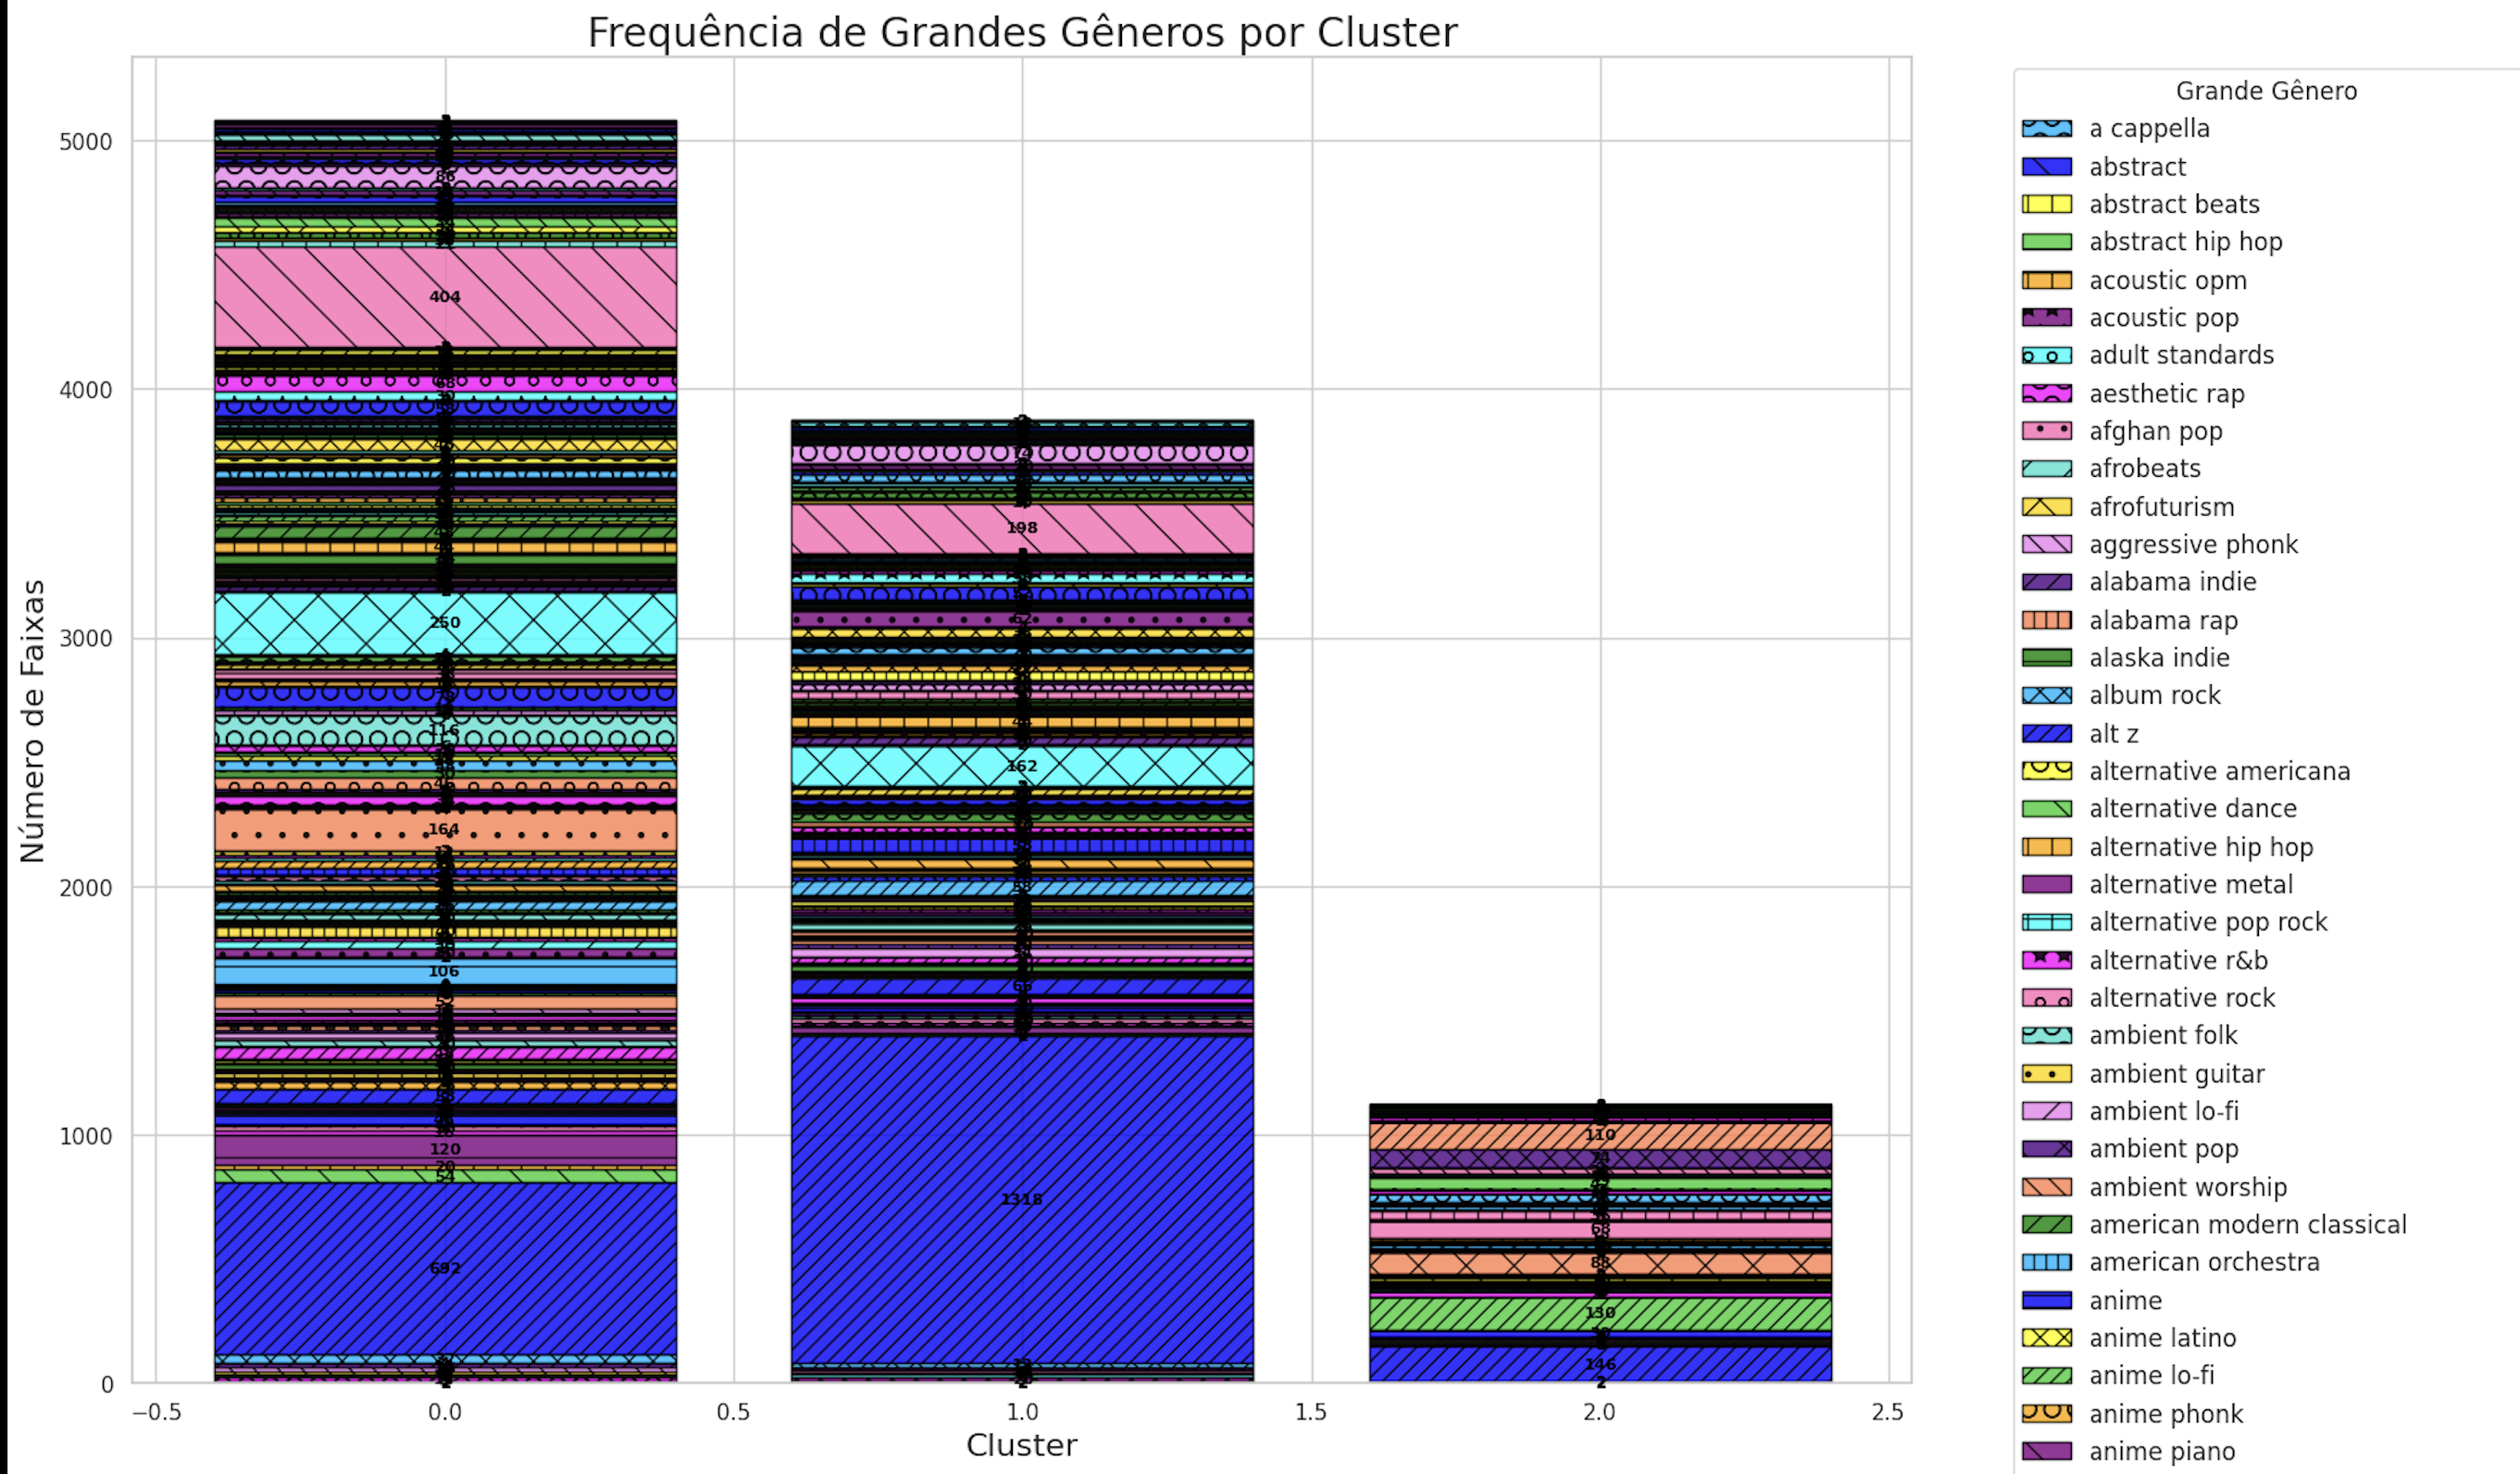

#### 2.3.1. Aplicação do Mapeamento

1. **Mapeamento dos Subgêneros**:
   - A coluna `genre` é transformada em `genre_mapped` utilizando um dicionário predefinido (`mapeamento_generos`) que agrupa subgêneros em categorias mais amplas ("grandes gêneros").
   
2. **Verificação de Gêneros Não Mapeados**:
   - Identificamos se há valores não mapeados (NaN) após a aplicação do dicionário. Embora não sejam esperados gêneros ausentes neste dataset, essa etapa garante que eventuais valores não previstos sejam detectados.

3. **Substituição de Valores Ausentes**:
   - Qualquer gênero não mapeado é substituído pela categoria "others" para evitar inconsistências no dataset.

4. **Atualização e Renomeação de Colunas**:
   - A coluna original `genre` é removida, e `genre_mapped` é renomeada para `genre` para manter a consistência no nome das colunas.

5. **Análise da Distribuição dos Gêneros**:
   - Exibimos a contagem de registros para cada grande gênero após o mapeamento, fornecendo uma visão geral da distribuição dos dados.


In [ ]:
# aplicamos o mapeamento dos generos com o "dicionario" que fizemos na celula anterior
# a coluna 'genre' eh mapeada para 'genre_mapped', fazendo a transformaçao de subgeneros
# para os grandes generos
df_relevante['genre_mapped'] = df_relevante['genre'].map(mapeamento_generos)

# identificamos quais generos nao foram mapeados (NaN)
# apos o mapeamento. Para esse caso não deve existir nenhum, pois fomos mapeando de pedaços em
# pedaços e a principio cobrimos todos os genêros nesse csv (não é muito inteligente de se fazer, mas
# para fins de garantir algo funcional e rapido foi a solução)
generos_nao_mapeados = df_relevante[df_relevante['genre_mapped'].isnull()]['genre'].unique()

# exibimos a quantidade de generos que nao foram mapeados e quais são eles
# novamente, isso seria relevante caso fosse utilizado outro csv do spotify de
# outros anos por exemplo, não é o que planejamos fazer nesse caso
print(f"\ngeneros nao mapeados ({len(generos_nao_mapeados)}):")
print(generos_nao_mapeados)

# substituimos os valores ausentes (NaN) da coluna 'genre_mapped' por 'Others'.
# so para garantir que nada fique sem uma classificacao
df_relevante['genre_mapped'] = df_relevante['genre_mapped'].fillna('others')

# atualizamos a coluna de generos no dataframe.
# primeiro, removemos a coluna original 'genre', pois ja fizemos o mapeamento
# na sequencia, renomeamos a coluna 'genre_mapped' para 'genre' para simplificar o nome e
# manter consistencia no dataset
df_relevante = df_relevante.drop(columns=['genre']).rename(columns={'genre_mapped': 'genre'})

# exibimos a distribuicao dos generos apos o mapeamento.
# contamos quantos registros existem para cada grande genero e imprimimos esses valores.
# isso nos da uma visao geral de como os generos estao distribuidos no dataset depois do mapeamento
print("\ndistribuicao dos grandes generos apos mapeamento:")
print(df_relevante['genre'].value_counts())



generos nao mapeados (0):
[]

distribuicao dos grandes generos apos mapeamento:
genre
Pop            2606
Alternative    2156
Others         1496
Rock            922
Hip-Hop/Rap     854
Electronic      606
Lo-fi           544
R&B             290
Soundtrack      218
Folk            188
Classical       126
Country          46
Reggae           16
Jazz              8
Blues             4
Name: count, dtype: int64


**Interpretação do Output:**

- Fizemos aqui uma atualização dos gêneros para o nosso mapeamento da célula anterior.
-  Como é possível ver, o output apresenta a nova distribuição de gêneros.

### 2.4. Uso do One-Hot Encoding e Padronização de Dados

1. Aplicamos o **one-hot encoding** à coluna `genre`, transformando valores categóricos em representações binárias. Para evitar multicolinearidade, usamos o parâmetro `drop_first=True`, o que exclui uma das categorias como referência (a primeira em ordem alfabética).
2. Calculamos a frequência de cada gênero codificado e determinamos quantos registros ficaram na categoria omitida, garantindo uma visão geral dos dados transformados.
3. **Padronizamos os dados numéricos**, ajustando-os para terem média zero e desvio padrão 1, o que é essencial para métodos baseados em distâncias, como clustering.
4. Por fim, verificamos as primeiras linhas do dataframe após cada transformação para garantir que as alterações foram aplicadas corretamente.

In [ ]:
# aplicamos o one-hot encoding (que eh um algoritmo que achamos para transformar valores não numericos
# em uma representação binaria, isso eh muito util para facilitar o tratamento dos dados)
# para a coluna 'genre'
# usamos drop_first=True para evitar multicolinearidade, ou seja, uma das categorias
# eh excluída para servir de referencia (nesse caso a primeira em ordem alfabetica).
df_encoded = pd.get_dummies(df_relevante, columns=['genre'], drop_first=True)

# verificamos as primeiras linhas do dataframe apos o one-hot encoding para garantir
# que a transformacao ocorreu conforme esperado e para termos uma ideia de como os dados ficaram
print("\nprimeiras linhas apos one-hot encoding com grandes generos:")
print(df_encoded.head())

# mostramos quantas colunas temos no dataframe apos a codificacao
# isso serve para sabermos quantas colunas binarias foram criadas a partir dos generos.
print(f"\nnovo numero de colunas apos one-hot encoding: {df_encoded.shape[1]}")

# identificamos as colunas que foram criadas para representar os generos ('genre_')
# calculamos a frequencia de cada grande genero usando a soma de cada coluna binaria,
# o que nos da quantas vezes cada genero aparece no dataset
generos_codificados = [col for col in df_encoded.columns if col.startswith('genre_')]
frequencia_generos = df_encoded[generos_codificados].sum().sort_values(ascending=False)

# imprimimos a frequencia de cada genero para termos uma visao de quantas faixas pertencem a cada genero codificado
print("\nfrequencia de cada grande genero:")
print(frequencia_generos)

# calculamos o numero total de faixas no dataset, que eh o mesmo que o numero de linhas do dataframe
total_faixas = df_encoded.shape[0]

# calculamos o numero de faixas atribuidas a qualquer genero codificado
# somando todas as colunas dos generos, e somando o resultado total
faixas_codificadas = df_encoded[generos_codificados].sum().sum()

# calculamos o numero de faixas que ficaram na categoria omitida (others).
# isso eh feito subtraindo o total de faixas codificadas do numero total de faixas do dataset
categorias_omitidas = total_faixas - faixas_codificadas
print(f"\nnumero de faixas na categoria others: {categorias_omitidas}")

# aplicamos padronizacao nos dados numericos para que eles tenham media zero e desvio padrao 1.
# isso eh importante para normalizar as escalas das diferentes variaveis numericas,
# especialmente antes de aplicarmos tecnicas que dependem das distancias, nesse caso o clustering
scaler = StandardScaler()
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# verificamos as primeiras linhas do dataframe apos a padronizacao para garantir
# que os dados numericos foram transformados corretamente e estão na mesma escala
print("\nprimeiras linhas apos padronizacao:")
print(df_encoded.head())



primeiras linhas apos one-hot encoding com grandes generos:
   danceability  energy  loudness  speechiness  acousticness  \
0         0.476   0.799    -4.939       0.2120        0.0162   
1         0.475   0.130   -17.719       0.0510        0.9160   
2         0.691   0.814    -3.788       0.1170        0.0164   
3         0.624   0.596    -9.804       0.0314        0.4750   
4         0.625   0.726   -11.402       0.0444        0.0158   

   instrumentalness  valence    tempo  genre_Blues  genre_Classical  ...  \
0          0.000000    0.577  162.139        False            False  ...   
1          0.956000    0.122  112.241        False             True  ...   
2          0.000000    0.509  132.012        False            False  ...   
3          0.203000    0.896  120.969        False            False  ...   
4          0.000169    0.507  124.945        False            False  ...   

   genre_Folk  genre_Hip-Hop/Rap  genre_Jazz  genre_Lo-fi  genre_Others  \
0       False         

**Interpretação dos Resultados do One-Hot Encoding:**

- O que acontece é simples, como os dados de gênero são categóricos, nós precisamos transformar ele em uma forma numérica. Para isso, o método one-hot, como expliquei nos comentários acima.

### 2.5. Implementação da SVD

Utilizamos a SVD para decompor os dados e identificar os componentes principais que preservam pelo menos 80% da variância total. Em seguida, projetamos os dados no espaço reduzido formado pelos componentes mais relevantes, reduzindo a dimensionalidade sem perder informações significativas.

In [ ]:
# tivemos que forçar a conversao de todos os dados do dataframe 'df_encoded' para float64,
# isso porque na conversão alguma coluna estava ficando como 'object' e quando procuravamos
# o objeto não aparecia nada, isso dava erro com o numpy, então achamos melhor fazer esse procedimento
df_encoded = df_encoded.astype(float, errors='raise')

# printamos os tipos apos a mudanca forçada só para garantir que tudo está de acordo com o esperado
print("\ntipos de dados apos reforçar a conversao para float:")
print(df_encoded.dtypes)

# recriamos a matriz A a partir do dataframe, convertendo para um numpy array
# isso permite que a gente use operações matriciais diretamente
A = df_encoded.to_numpy()

# verificamos o tipo de dados da matriz A para garantir que todos os valores foram convertidos para 'float64'
print("\ntipo de dados da matriz A apos conversao reforçada:", A.dtype)

# essa funcao abaxo nos tinhamos usado para tentar achar o valor nao numerico,
# mas decidimos forçar float no final das contas, então ele se tornou obsoleta
# deixamos no código como opção caso no futuro, por ventura, forçar dê algum problema


# if A.dtype != 'float64':
#
#     non_finite_mask = ~np.isfinite(A)
#     rows, cols = np.where(non_finite_mask)
#     print("\nnumero de entradas nao numericas ou infinitas:", len(rows))
#     if len(rows) > 0:
#
#         for i in range(min(5, len(rows))):
#             print(f"entrada nao numerica na linha {rows[i]}, coluna {cols[i]}: {A[rows[i], cols[i]]}")

#         df_encoded_clean = df_encoded[~non_finite_mask.any(axis=1)]
#         A_clean = df_encoded_clean.to_numpy()
#         print("\nmatriz A apos remover linhas com entradas nao numericas:", A_clean.shape)
#     else:
#         print("nao foram encontradas entradas nao numericas ou infinitas.")
# else:
#     print("todos os dados na matriz A sao numericos.")


# reconvertendo o dataframe para uma matriz numpy e armazenando em A, de novo só pra garantir
# dimensao (m, n)
A = df_encoded.values
print(f"\nmatriz A: {A.shape}")

# agora fazemos a decomposicao SVD completa da matriz A
# 'U', 'S' e 'VT' sao as componentes da decomposicao
U, S, VT = np.linalg.svd(A, full_matrices=False)

# verificamos as formas das matrizes resultantes para garantir que a decomposicao foi feita como esperávamos
print(f"U: {U.shape}")      # (m, n)
print(f"S: {S.shape}")      # (n,)
print(f"VT: {VT.shape}")    # (n, n)

# aqui calculamos a proporção de variancia explicada por cada componente singular
# a variância é obtida pelo quadrado dos valores singulares dividido pela soma dos quadrados totais
var_exp = (S**2) / np.sum(S**2)
cum_var_exp = np.cumsum(var_exp)

# exibimos a variância explicada por cada componente e também a variância acumulada
# isso nos dá uma ideia de quanto de informação cada componente está retendo
print("\nproporcao de variancia explicada por cada componente:")
for i, (v, cum_v) in enumerate(zip(var_exp, cum_var_exp), start=1):
    print(f"componente {i}: {v:.4f}, variancia acumulada: {cum_v:.4f}")

# agora selecionamos o numero de componentes que preserve pelo menos 80% da variância
# definimos um threshold de 0.80 e usamos 'np.argmax' para encontrar o primeiro indice onde a variância acumulada é >= 80%
threshold = 0.80
k = np.argmax(cum_var_exp >= threshold) + 1
print(f"\nnumero de componentes para >=80% de variancia: {k}")

# selecionamos os primeiros k componentes de U, S e VT para garantir uma redução que preserve os 80% de variância
U_k = U[:, :k]          # (m, k)
S_k = S[:k]             # (k,)
VT_k = VT[:k, :]        # (k, n)

print(f"U_k: {U_k.shape}")
print(f"S_k: {S_k.shape}")
print(f"VT_k: {VT_k.shape}")

# criamos a matriz Sigma_k com os valores singulares reduzidos e projetamos os dados no espaço reduzido
# a matriz sigma_k é diagonal, e projetamos os dados multiplicando U_k pela matriz diagonal sigma_k
Sigma_k = np.diag(S_k)  # (k, k)
X_reduced = np.dot(U_k, Sigma_k)  # (m, k)
print(f"espaco reduzido X_reduced: {X_reduced.shape}")



tipos de dados apos reforçar a conversao para float:
danceability         float64
energy               float64
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
valence              float64
tempo                float64
genre_Blues          float64
genre_Classical      float64
genre_Country        float64
genre_Electronic     float64
genre_Folk           float64
genre_Hip-Hop/Rap    float64
genre_Jazz           float64
genre_Lo-fi          float64
genre_Others         float64
genre_Pop            float64
genre_R&B            float64
genre_Reggae         float64
genre_Rock           float64
genre_Soundtrack     float64
dtype: object

tipo de dados da matriz A apos conversao reforçada: float64

matriz A: (10080, 22)
U: (10080, 22)
S: (22,)
VT: (22, 22)

proporcao de variancia explicada por cada componente:
componente 1: 0.3820, variancia acumulada: 0.3820
componente 2: 0.1267, variancia acumulada: 0.5087
componente 3: 0.11

**Interpretação dos Resultados da SVD:**

- Todas as colunas foram convertidas para `float64`, e a **Matriz A** tem dimensões **(10080, 22)**.
- Após a aplicação da **SVD**, obtemos `U`, `S`, `VT` e verificamos que os primeiros **5 componentes** explicam **80%** da variância total dos dados.
- A projeção dos dados no espaço reduzido, representada pela matriz `X_reduced`, possui dimensões **(10080, 5)**.
- Essa redução de **22 para 5 dimensões** permite simplificar a estrutura dos dados, preservando a maioria das informações relevantes.
- Com isso, conseguimos melhorar a eficiência do processamento e reduzir a complexidade dos cálculos futuros.

### 2.6. Determinação do Número Ótimo de Clusters

Utilizaremos o **Método do Cotovelo** e o **Silhouette Score** para determinar o número ideal de clusters.

- **Método do Cotovelo**: Este método é utilizado para encontrar o número ótimo de clusters ao analisar a **inércia**, que é a soma das distâncias quadráticas dos pontos ao centro do cluster mais próximo. Matematicamente, a inércia é definida como:

  $$
  J(K) = \sum_{k=1}^K \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
  $$

  Onde:
  - \( K \) é o número de clusters.
  - \( C_k \) é o conjunto de pontos atribuídos ao cluster \( k \).
  -  $(\space\mu_k\space)$ é o centro do cluster \( k \).
  - \( x_i \) são os pontos de dados pertencentes ao cluster \( C_k \).
  - $( \|x_i - \mu_k\|^2 )$ é a distância quadrada do ponto $( x_i )$ ao centro do cluster $( \mu_k )$.

  No **Método do Cotovelo**, plota-se o valor da inércia \( J(K) \) em função do número de clusters \( K \). O ponto em que a taxa de diminuição da inércia começa a se estabilizar (ou seja, o "cotovelo" da curva) é considerado o valor ideal de \( K \).

- **Silhouette Score**: O **Silhouette Score** é uma métrica que mede a qualidade dos clusters. Para cada ponto de dados, ele compara a **distância média intra-cluster** (a distância entre um ponto e os outros pontos do mesmo cluster) com a **distância média inter-cluster** (a distância entre um ponto e os pontos de outros clusters). O **Silhouette Score** para um ponto \( i \) é dado pela fórmula:

  $$
  s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
  $$

  Onde:
  - \( a(i) \) é a **distância média intra-cluster** do ponto \( i \) aos outros pontos no mesmo cluster.
  - \( b(i) \) é a **distância média inter-cluster** do ponto \( i \) ao cluster mais próximo (ao qual \( i \) não pertence).
  - \( s(i) \) varia de **-1** a **1**:
    - Valores próximos de **1** indicam que o ponto está bem agrupado com os outros do mesmo cluster e bem separado dos outros clusters.
    - Valores próximos de **0** indicam que o ponto está próximo à fronteira de separação entre dois clusters.
    - Valores negativos indicam que o ponto provavelmente foi agrupado no cluster errado.

  O **Silhouette Score** total é a média dos \( s(i) \) para todos os pontos no conjunto de dados:

  $$
  S = \frac{1}{N} \sum_{i=1}^N s(i)
  $$

  Onde \( N \) é o número total de pontos. Um valor mais alto de \( $S$ \) indica uma melhor separação entre os clusters.


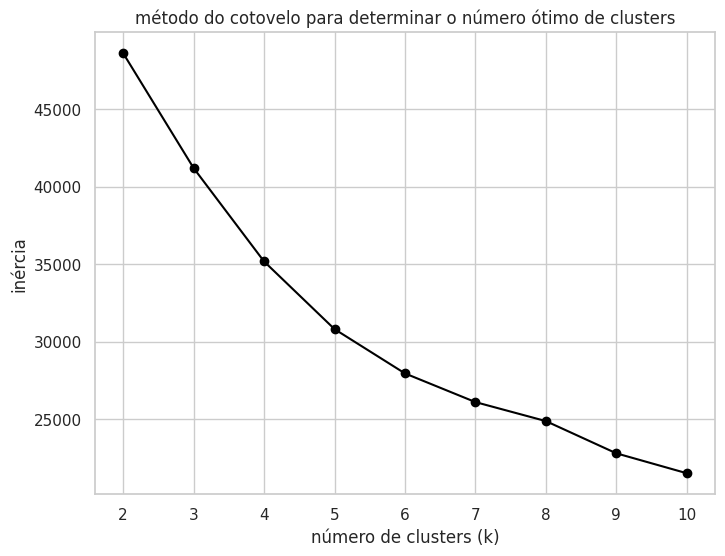

silhouette score para k=2: 0.3711
silhouette score para k=3: 0.2240
silhouette score para k=4: 0.2736
silhouette score para k=5: 0.2238
silhouette score para k=6: 0.2278
silhouette score para k=7: 0.2179
silhouette score para k=8: 0.2178
silhouette score para k=9: 0.2286
silhouette score para k=10: 0.2251


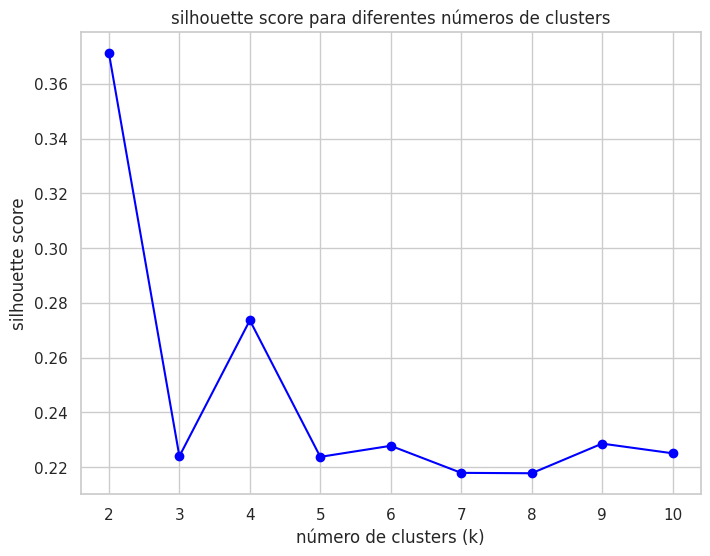


número ótimo de clusters selecionado: 2


In [ ]:
# aplicamos o método do cotovelo para determinar o número ideal de clusters
# a ideia é variar o numero de clusters de 2 a 10 e medir a "inércia" para cada valor,
# que indica o quão bem os pontos de dados foram agrupados.
inercia = []
K_range = range(2, 11)

# iteramos sobre os valores de K (de 2 a 10) para calcular a inércia e descobrir o "cotovelo"
for num_clusters in K_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_reduced)
    inercia.append(kmeans.inertia_)

# agora fazemos a visualização do método do cotovelo para identificar onde a redução de inércia desacelera
# esse ponto é onde geralmente está o número ideal de clusters, ou seja, o "cotovelo" da curva
plt.figure(figsize=(8,6))
plt.plot(K_range, inercia, marker='o', linestyle='-', color='black')  # linha preta com círculos
plt.xlabel('número de clusters (k)')
plt.ylabel('inércia')
plt.title('método do cotovelo para determinar o número ótimo de clusters')
plt.grid(True)
plt.show()

# também vamos calcular o silhouette score para cada número de clusters no mesmo intervalo
# o silhouette score mede a qualidade da separação dos clusters, quanto maior for o score, maior
# a diferença entre os clusters (o que é bom)
sil_scores = []

# iteramos sobre os valores de K (de 2 a 10) para calcular o silhouette score e entender a qualidade dos agrupamentos
for num_clusters in K_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_reduced)
    sil = silhouette_score(X_reduced, labels_kmeans)
    sil_scores.append(sil)
    print(f"silhouette score para k={num_clusters}: {sil:.4f}")

# fazemos o gráfico dos silhouette scores para diferentes valores de K
plt.figure(figsize=(8,6))
plt.plot(K_range, sil_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('número de clusters (k)')
plt.ylabel('silhouette score')
plt.title('silhouette score para diferentes números de clusters')
plt.grid(True)
plt.show()

# definimos o número ideal de clusters com base nos resultados do método do cotovelo e do silhouette score
# para nós o mais interessante foi o k = 2, porém eu recomendaria que testassemm trocando k para 4 também
# apesar de haverem dois clusters bem menos definidos, no 4 a definição de alguns generos fica bem mais evidente
# dito isso com k = 2 é onde temos clusters de maior 'qualidade'
k_optimo = 2
print(f"\nnúmero ótimo de clusters selecionado: {k_optimo}")


**Interpretação dos Gráficos:**

- Como falei nos comentários anteriores, a ideia aqui é selecionar no segundo gráfico o ponto (número de clusters) em que o silhouette score é o mais alto possível. O motivo para isso é a definição dos clusters, ou seja, eles estarão melhores definidos para o maior pico do silhouette score. Nesse caso, k = 2.

### 2.7. Aplicação do K-means e Visualização dos Clusters

Aplicaremos o K-means com o número ótimo de clusters para visualizarmos os resultados.

1. **Aplicação do K-means**:
   - Utilizamos o K-means com o número de clusters ideal (`k_optimo`) para agrupar os dados. Os rótulos de cluster (labels) são atribuídos a cada ponto no conjunto de dados reduzido (`X_reduced`).

2. **Adição dos Rótulos ao DataFrame**:
   - Criamos uma cópia do dataframe codificado (`df_encoded`) e adicionamos uma nova coluna chamada `Cluster`, que contém os rótulos gerados pelo K-means, permitindo análise e visualização dos grupos.

3. **Cálculo do Silhouette Score**:
   - Avaliamos a qualidade do agrupamento utilizando o Silhouette Score, que mede o quão bem definidos estão os clusters. Um valor próximo de 1 indica clusters bem separados.

4. **Visualização dos Clusters**:
   - Cada cluster é visualizado em um gráfico 2D, com os dados projetados nas duas primeiras componentes reduzidas por SVD.
   - Utilizamos a paleta "colorblind" do Seaborn para garantir que as cores sejam acessíveis para pessoas com daltonismo, juntamente com marcadores distintos para cada cluster.

5. **Configuração do Gráfico**:
   - Adicionamos título, rótulos nos eixos e uma legenda indicando as cores e os marcadores de cada cluster, facilitando a interpretação dos resultados.



Silhouette Score para k=2: 0.37


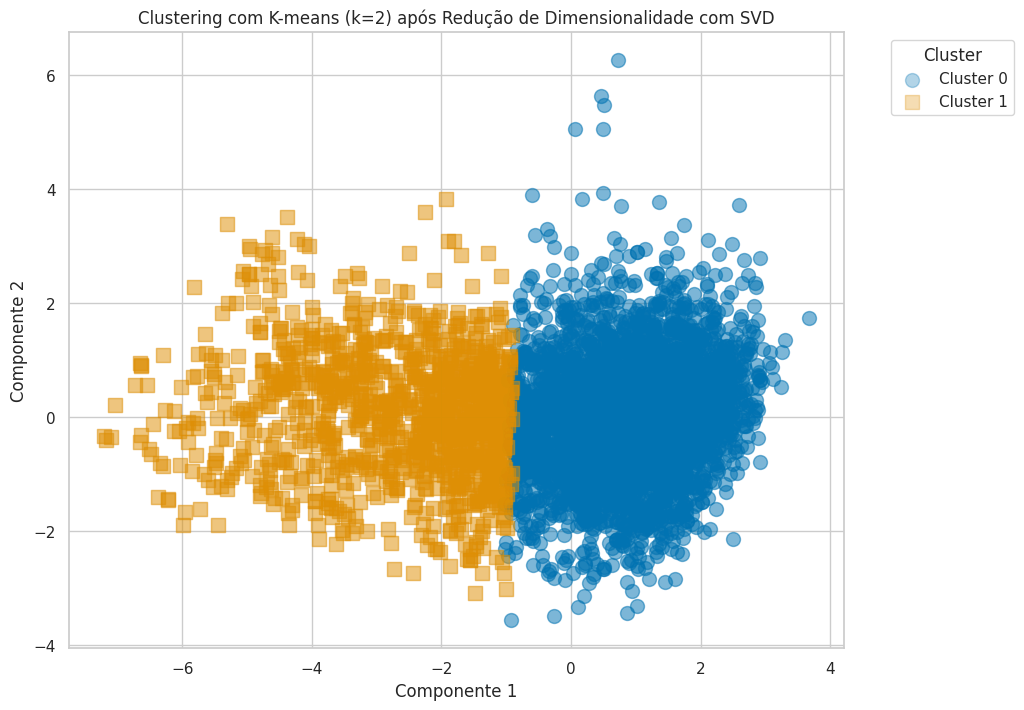

In [ ]:
# aplicamos o K-means utilizando o número ótimo de clusters (k_optimo) que julgamos ser o ideal anteriormente
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
labels = kmeans.fit_predict(X_reduced)

# criamos uma cópia do DataFrame df_encoded e adicionamos a coluna 'Cluster' com os labels obtidos pelo K-means
# isso nos permite visualizar quais pontos pertencem a quais clusters
df_encoded = df_encoded.copy()
df_encoded['Cluster'] = labels

# calculamos o Silhouette Score para o clustering atual
silhouette = silhouette_score(X_reduced, labels)
print(f"\nSilhouette Score para k={k_optimo}: {silhouette:.2f}")

# visualização dos clusters resultantes após o K-means
# utilizamos uma paleta de cores "colorblind" (porque eu, Felipe, não consigo enxergar direto ;-;) do seaborn para garantir que as cores sejam visualmente acessíveis
# vá que o Jorge também seja daltônico :D
cb_palette = sns.color_palette("colorblind", n_colors=k_optimo)
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*']  # lista de marcadores para diferenciar clusters

# plotamos cada cluster, atribuindo uma cor e um marcador diferente para cada um
plt.figure(figsize=(10,8))
for cluster in range(k_optimo):
    plt.scatter(
        X_reduced[labels == cluster, 0],  # eixos x dos pontos pertencentes ao cluster atual
        X_reduced[labels == cluster, 1],  # eixos y dos pontos pertencentes ao cluster atual
        s=100,
        alpha=0.3,
        label=f'Cluster {cluster}',
        color=cb_palette[cluster],
        marker=markers[cluster % len(markers)]
    )

# definimos o título e os rótulos dos eixos para melhor contexto
plt.title(f'Clustering com K-means (k={k_optimo}) após Redução de Dimensionalidade com SVD')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
# adicionamos uma legenda para indicar qual cor corresponde a qual cluster
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Interpretação dos Resultados do Clustering com K-means (k=2)

Neste gráfico, visualizamos o resultado do **clustering com K-means**, considerando **k=2** após a **redução de dimensionalidade com SVD**. As cores (azul e laranja) representam os dois clusters identificados.

- O **Silhouette Score** para **k=2** é **0.37**, o que indica uma **qualidade moderada** de separação entre os clusters. O valor positivo do score sugere que os pontos estão corretamente atribuídos aos clusters, mas não há uma separação extremamente nítida.
- Além disso, é evidente que ainda existem sobreposições entre os clusters. Isso pode ser resultado da redução dimensional pela qual os dados passaram ou até mesmo pelo fato de que músicas de gêneros diferentes podem possuir grandes similaridades (acredito que essa seja a principal razão para a intersecção dos clusters). Como nossa análise é puramente sobre dados numéricos, o agrupamento respeita a similaridade entre números e não gêneros de fato, isso reforça a ideia de que existe uma grande similaridade entre a composição sonora dos mais distintos gêneros musicais (principalmente os mais populares), o que muitas vezes passa despercebido.

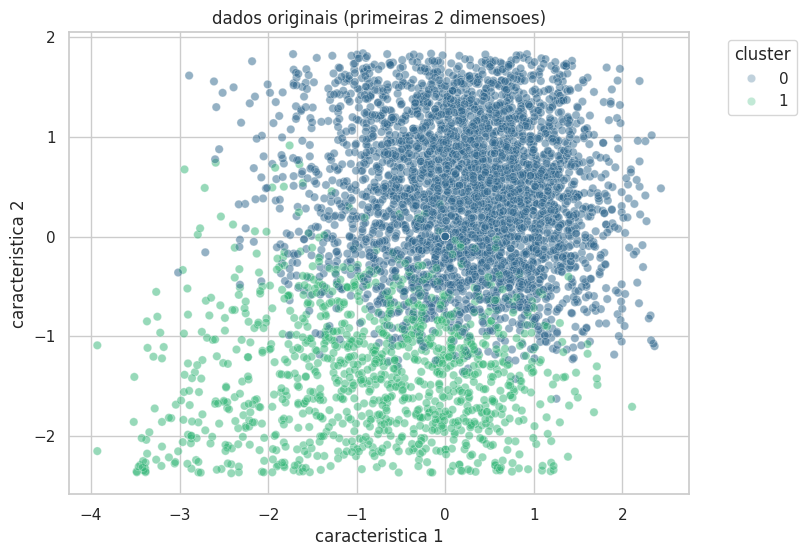

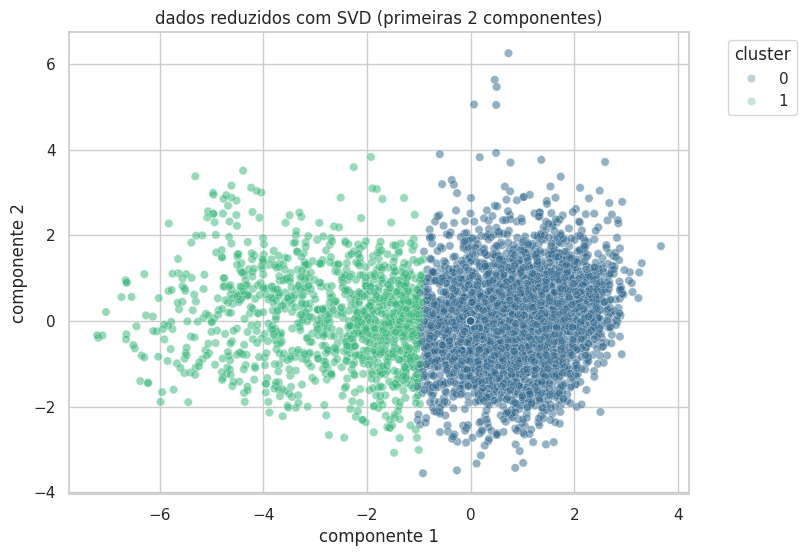

In [ ]:
# visualizacao das dimensoes antes de aplicar a reducao de dimensionalidade com SVD.
# criamos um scatterplot usando as duas primeiras colunas de 'df_encoded' como eixos x e y
# usamos o 'hue' a colorir os pontos de cada label, o que ajuda visualizar o comportamento dos dados originais no cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_encoded.iloc[:,0], y=df_encoded.iloc[:,1], hue=labels, palette='viridis', alpha=0.3)
plt.title('dados originais (primeiras 2 dimensoes)')
plt.xlabel('caracteristica 1')
plt.ylabel('caracteristica 2')
plt.legend(title='cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# visualizacao das dimensoes apos aplicarmos a reducao com SVD
# novamente usamos um scatterplot, agora com os dados reduzidos 'X_reduced', eixos x e y representam as duas primeiras componentes.
# as cores tambem são atribuídas de acordo com os labels para visualizar se os clusters ficaram mais concentrados dentro do seu proprio tipo após
# reduzir a dimensao, importante reçaltar que o efeito esperado é muito maior, já que eram 22 dimensoes originalmente,
# mas com apenas essas colunas já é possivel ver alguma diferença
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=labels, palette='viridis', alpha=0.3)
plt.title('dados reduzidos com SVD (primeiras 2 componentes)')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend(title='cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Interpretação das Visualizações:**

1. **Dados Originais:**
   - O gráfico de dispersão das primeiras 2 características originais pode mostrar uma distribuição mais dispersa dos clusters, com possíveis sobreposições.

2. **Dados Reduzidos com SVD:**
   - O gráfico de dispersão das primeiras 2 componentes principais do espaço reduzido deve revelar uma distribuição mais compacta e bem definida dos clusters, facilitando a identificação de padrões distintos.


### 2.8. Análise da Frequência de Gêneros por Cluster

Analisamos aêdistribuição dos gêneros em cada cluster para interpretar os resultados. Para isso, um gráfico em barras é feito com a distribuição dos gêneros baseados nas características das músic

1. **Criação do Subconjunto de Dados**:
   - Copiamos o dataframe com as linhas correspondentes à redução dimensional e adicionamos a coluna `Cluster`, que identifica a qual cluster cada linha pertence.

2. **Análise de Frequência**:
   - Calculamos a frequência de cada gênero em cada cluster utilizando `groupby` e transformamos os dados em uma tabela organizada com `unstack`, preenchendo valores ausentes com zero.

3. **Configuração do Gráfico**:
   - Criamos um gráfico de barras empilhadas, onde cada barra representa um cluster, com cores vibrantes e padrões de hachuras para facilitar a diferenciação visual (útil para daltonismo).
   - As barras são empilhadas usando uma variável `bottom` que controla a base inicial de cada camada.

4. **Anotações no Gráfico**:
   - Adicionamos os valores exatos de frequência no interior das barras para facilitar a leitura quantitativa direta no gráfico.

5. **Ajustes Finais no Gráfico**:
   - Configuramos título, rótulos de eixos, legenda com os gêneros representados, e ajustamos o layout para melhor visualização.

6. **Exibição de Dados Tabulares**:
   - Para complementar a análise gráfica, exibimos uma tabela formatada com os valores de frequência, ordenados por cluster e gênero, facilitando a análise detalhada.


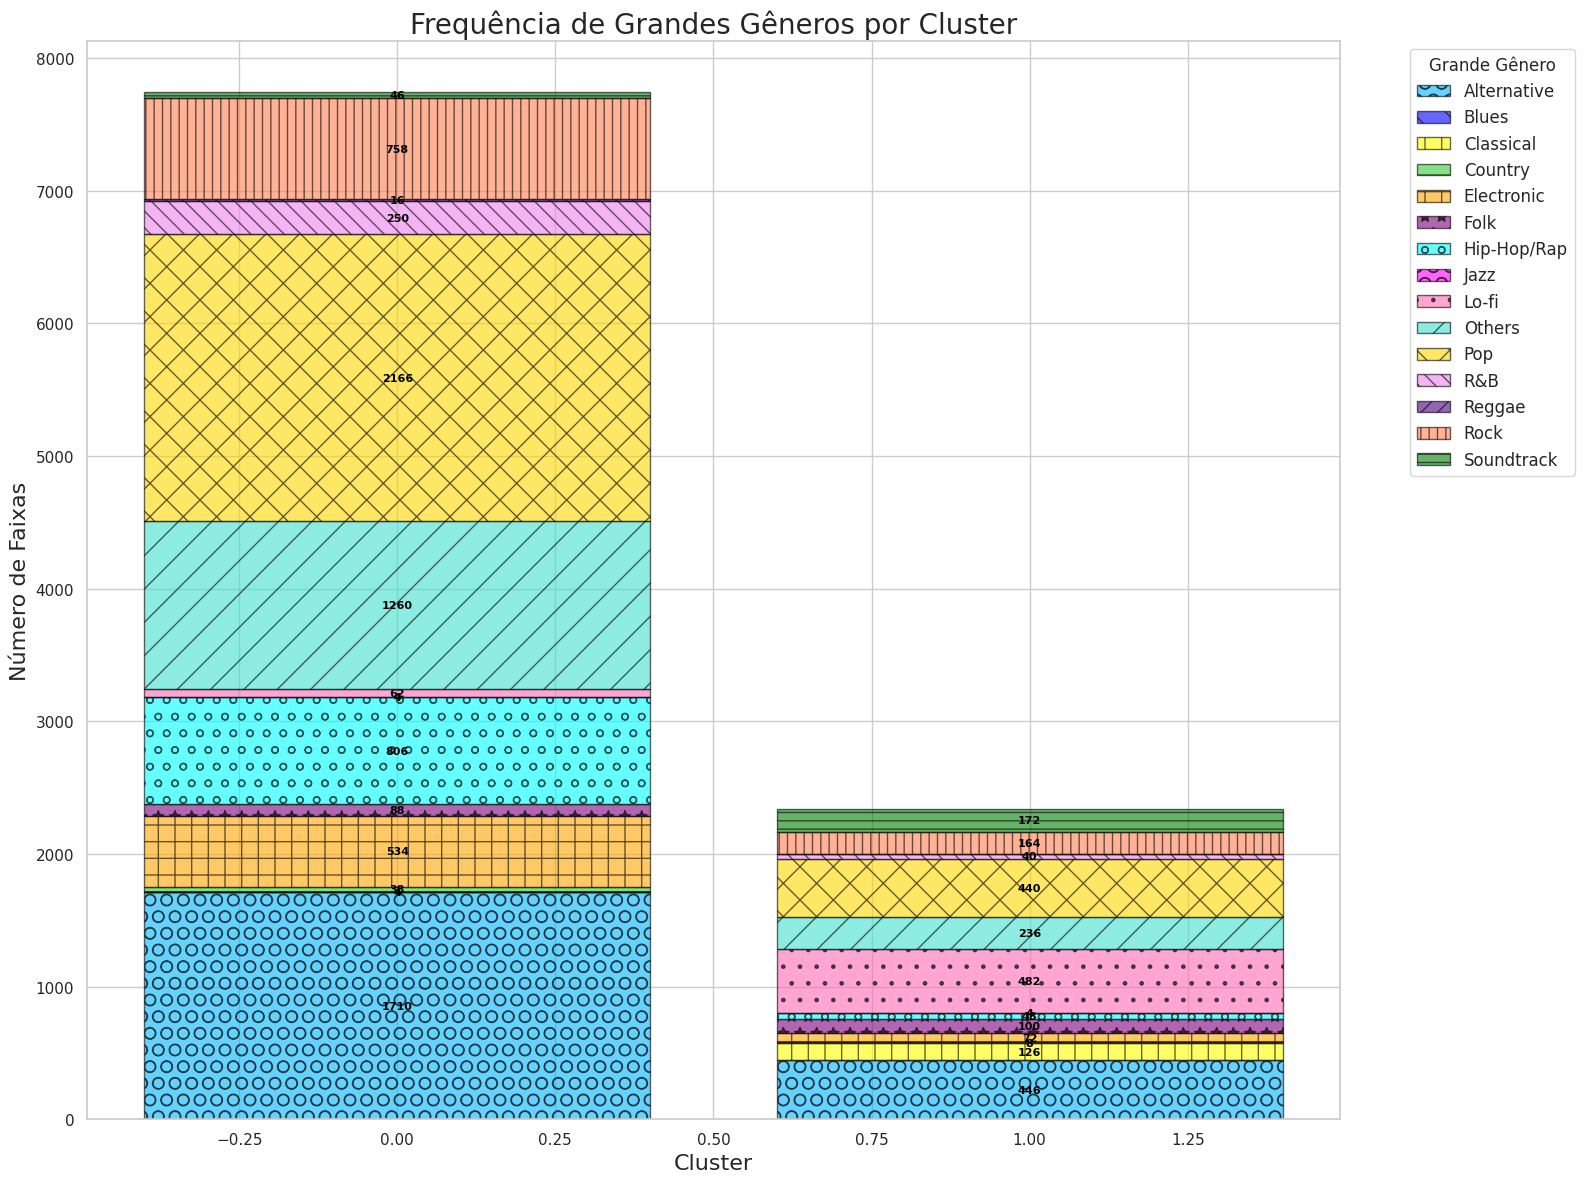

genre,Alternative,Blues,Classical,Country,Electronic,Folk,Hip-Hop/Rap,Jazz,Lo-fi,Others,Pop,R&B,Reggae,Rock,Soundtrack
Cluster,,,,,,,,,,,,,,,
0,1710,4,0,38,534,88,806,4,62,1260,2166,250,16,758,46
1,446,0,126,8,72,100,48,4,482,236,440,40,0,164,172


In [ ]:
# selecionamos um subconjunto do dataframe original 'df_relevante', mantendo as mesmas linhas utilizadas na SVD
# resetamos o índice para facilitar o trabalho com o novo dataframe e adicionamos a coluna 'Cluster' para marcar em qual cluster cada linha pertence
df_subset = df_relevante.copy().reset_index(drop=True)
df_subset = df_subset.assign(Cluster=labels)

# contamos a frequência de cada gênero por cluster para entender como os gêneros estão distribuídos entre os clusters formados
frequencia = df_subset.groupby(['Cluster', 'genre']).size().unstack(fill_value=0)

# obtemos a lista de todos os gêneros que aparecem nos clusters e o número total de gêneros
genres = frequencia.columns.tolist()
num_genres = len(genres)

# definimos padrões de hatches para cada gênero, para diferenciar visualmente as barras no gráfico
# (de novo, é porque sou daltonico e nao conseguia diferenciar)
hatches = [
    'O', '\\', '|', '-', '+', '*', 'o', 'O', '.', '/',
    'X', '\\\\', '//',  '||', '--', 'xx', '///'
]
hatch_patterns = [hatches[i % len(hatches)] for i in range(num_genres)]

vibrant_palette = [ #pegamos esses valores do site: https://encycolorpedia.pt/
    '#00b5ff',  # azul mais claro?
    '#0000ff',  # azul forte
    '#ffff00',  # amarelo forte
    '#32cd32',  # verde lima
    '#ffa500',  # laranja forte
    '#800080',  # roxo forte
    '#00ffff',  # ciano forte
    '#ff00ff',  # magenta forte
    '#ff69b4',  # rosa choque
    '#40e0d0',  # turquesa
    '#FFd700',  # ouro
    '#ee82ee',  # violeta
    '#4b0082',  # índigo
    '#ff7f50',  # coral
    '#008000'   # verde esmeralda
]

# plotamos o gráfico manualmente para adicionar hachuras e cores vibrantes
fig, ax = plt.subplots(figsize=(16,12))

# variável 'bottom' inicializada é com zeros para controlar o empilhamento das barras no gráfico
bottom = np.zeros(len(frequencia))
for idx, (genre, hatch) in enumerate(zip(genres, hatch_patterns)):
    ax.bar(
        frequencia.index,          # índice dos clusters
        frequencia[genre],         # valores de frequência para cada gênero
        bottom=bottom,
        label=genre,
        color=vibrant_palette[idx % len(vibrant_palette)],  # cor do gênero
        hatch=hatch,
        edgecolor='black',
        alpha=0.6
    )
    # atualizamos o valor de 'bottom' para a próxima camada da barra
    bottom += frequencia[genre]

# mostra a frequência
for i in range(len(frequencia)):
    cumulative = 0
    for genre in genres:
        count = frequencia.iloc[i][genre]
        if count > 0:
            ax.text(
                i,
                cumulative + count/2,
                int(count),
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            ).set_weight('bold')
            cumulative += count

# definimos os dados do grafico
ax.set_title('Frequência de Grandes Gêneros por Cluster', fontsize=20)
ax.set_xlabel('Cluster', fontsize=16)
ax.set_ylabel('Número de Faixas', fontsize=16)
ax.legend(title='Grande Gênero', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


# como o gráfico não fica perfeito, consideramos que uma tabela com os valores brutos seria bem-vinda para melhor analise
# ordenamos a tabela 'frequencia' por cluster e gênero para melhorar a visualização dos dados
frequencia_sorted = frequencia.sort_index()


styled_table = frequencia_sorted.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12px'), ('text-align', 'center'), ('background-color', '#00000')]},
    {'selector': 'td', 'props': [('font-size', '10px'), ('text-align', 'center')]}
]).set_caption("Tabela 1: Frequência de Gêneros por Cluster")

display(styled_table)


## 3. Resultados e Discussões

### 3.1. Redução de Dimensionalidade

A aplicação da SVD resultou na redução de dimensionalidade dos dados de 22 para 5 componentes, preservando aproximadamente 80% da variância total. Isso indica que os componentes selecionados capturam uma quantidade significativa da informação presente nos dados originais, permitindo uma análise mais eficiente.

### 3.2. Determinação do Número Ótimo de Clusters

Utilizando o Método do Cotovelo e o Silhouette Score, determinamos que o número ótimo de clusters é **2**. Este número equilibra a inércia (Soma das Distâncias ao Centroide) e a coesão dos clusters, garantindo que os grupos formados sejam bem definidos e interpretáveis.

### 3.3. Aplicação do K-means

O algoritmo K-means foi aplicado com **2 clusters**, resultando em uma Silhouette Score de **0.3711**. Embora não seja uma pontuação extremamente alta, indica que há uma certa coesão dentro dos clusters, mas também pode sugerir sobreposição entre eles. Isso é verificado nos gráficos gerados ao longo do trabalho, já que, apesar de estarem majoritariamente separados, os clusters possuem uma fronteira em comum.

### 3.4. Análise da Frequência de Gêneros por Cluster

A distribuição dos gêneros musicais por cluster revela os seguintes padrões:

- **Cluster 0:** Predominância de gêneros como Pop, Electronic e Hip-Hop/Rap, Alternative e Rock indicando um grupo diversificado de músicas populares.
- **Cluster 1:** Gêneros relacionados a Alternative, Lo-Fi, Pop, Classical e Sountrack são mais frequentes, sugerindo uma combinação de estilos, em geral, mais seletas.

Esses resultados são simples, mas permitem interpretações muito interessantes. Para começar, é importante entender que essa classificação se deu puramente sobre dados numéricos, os quais, em sua maioria, definem algum aspecto que constitue a música sendo analisada. A sobreposição dos dados não é uma surpresa nesse contexto, uma vez que é conhecido que músicas populares, em grande parte, utilizam estratégias de composição similares, que apelam para o interesse dos ouvintes. Isso não quer dizer, todavia, que todas as músicas de um certo estilo devem obedecer essas regras, e nem por isso elas deixam de ser classificadas como são. Essas músicas definidas por palavras diferentes mas com aspectos similares são o que acredito caracterizar as sobreposições dos clusters. Por fim, podemos analisar no cluster **1** que músicas Lo-Fi, clássicas, rock e soundtrack estão especialmente aparente, o que não é verdade no cluster **0**, isso indica que esses gêneros possuem considerável semelhança entre si, o que empiricamente também faz sentido.



## 4. Conclusão

Neste projeto, aplicamos a decomposição de valores singulares (SVD) para reduzir a dimensionalidade de um dataset de atributos musicais do Spotify. Em seguida, utilizamos o algoritmo K-means para realizar o agrupamento dos dados reduzidos em três clusters distintos.

**Principais Achados:**
- A SVD permitiu reduzir a dimensionalidade de 22 para 5 componentes, preservando mais de 80% da variância total.
- O método do cotovelo e o Silhouette Score indicaram que **2** clusters eram os mais apropriados para os dados analisados.
- A análise da frequência de gêneros por cluster revelou padrões claros, destacando a diversidade dentro dos grupos formados.

**Limitações:**
- A pontuação do Silhouette Score sugere que há sobreposição entre os clusters, o que pode ser melhorado com ajustes nos parâmetros ou utilizando métodos de clustering alternativos, apesar de acreditarmos que é natural que ocorram sobreposições no contexto musical.

Tendo agora concluído esse trabalho, estamos muito satisfeitos com os resultados. É claro que melhorias são possíveis, no entando, além da possibilidade de aplicar algo aprendido em aula, nós conseguimos verificar interpretações próprias a respeito de um tópico de interesse comum através dos resultados obtidos. Esse fato sozinho já valeria a experiência, porém esperamos ter a oportunidade de expandir ainda mais nosso entendimento dessas aplicações e poder utilizá-las em projetos futuros a fim de obter resultados ainda mais relevantes.

## 5. Referências

- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [Wikipedia: Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)
- [Wikipedia: K-means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)
- [One-Hot Enconding](https://www.geeksforgeeks.org/ml-one-hot-encoding/)
- Yanai et al. (2011). *Capítulo 2*
- Meyer, C.D. (2001). *Capítulo 5, seções 5.13 e 5.14*
- Friedman et al. (2001). *Seções 3.2 a 3.4*
